
#Pemahaman Data ( data understanding)





## Data loading


In [8]:
import pandas as pd

try:
    df_cirrhosis = pd.read_csv('cirrhosis.csv')
    display(df_cirrhosis.head())
    display(df_cirrhosis.dtypes)
except FileNotFoundError:
    print("Error: 'cirrhosis.csv' not found. Please ensure the file is in the correct location.")
except Exception as e:
    print(f"An error occurred: {e}")

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400.0,D,D-penicillamine,21464.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500.0,C,D-penicillamine,20617.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012.0,D,D-penicillamine,25594.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925.0,D,D-penicillamine,19994.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504.0,CL,Placebo,13918.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


,0
ID,object
N_Days,float64
Status,object
Drug,object
Age,float64
Sex,object
Ascites,object
Hepatomegaly,object
Spiders,object
Edema,object


## Data exploration
.


,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,412.000000,412.000000,284.000000,412.000000,310.000000,312.000000,312.000000,282.000000,401.000000,410.000000
mean,18498.286408,3.227670,369.510563,3.500073,97.648387,1982.655769,122.556346,124.702128,256.102244,10.733415
std,3823.705746,4.429421,231.944545,0.423948,85.613920,2140.388824,56.699525,65.148639,95.750598,1.026557
min,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,15609.250000,0.800000,249.500000,3.247500,41.250000,871.500000,80.600000,84.250000,189.000000,10.000000
50%,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,249.000000,10.600000
75%,21200.500000,3.400000,400.000000,3.782500,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000
max,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000


,0
ID,0
N_Days,6
Status,6
Drug,106
Age,6
Sex,6
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,6


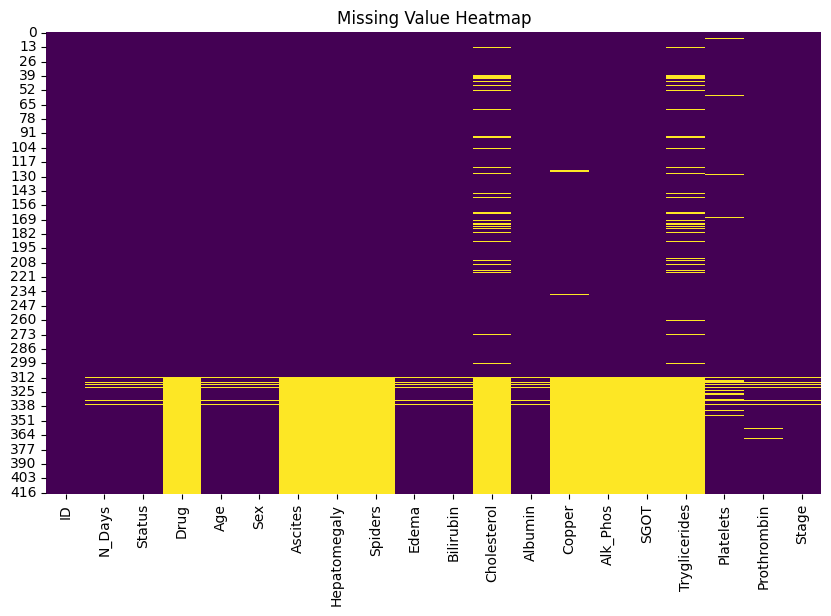

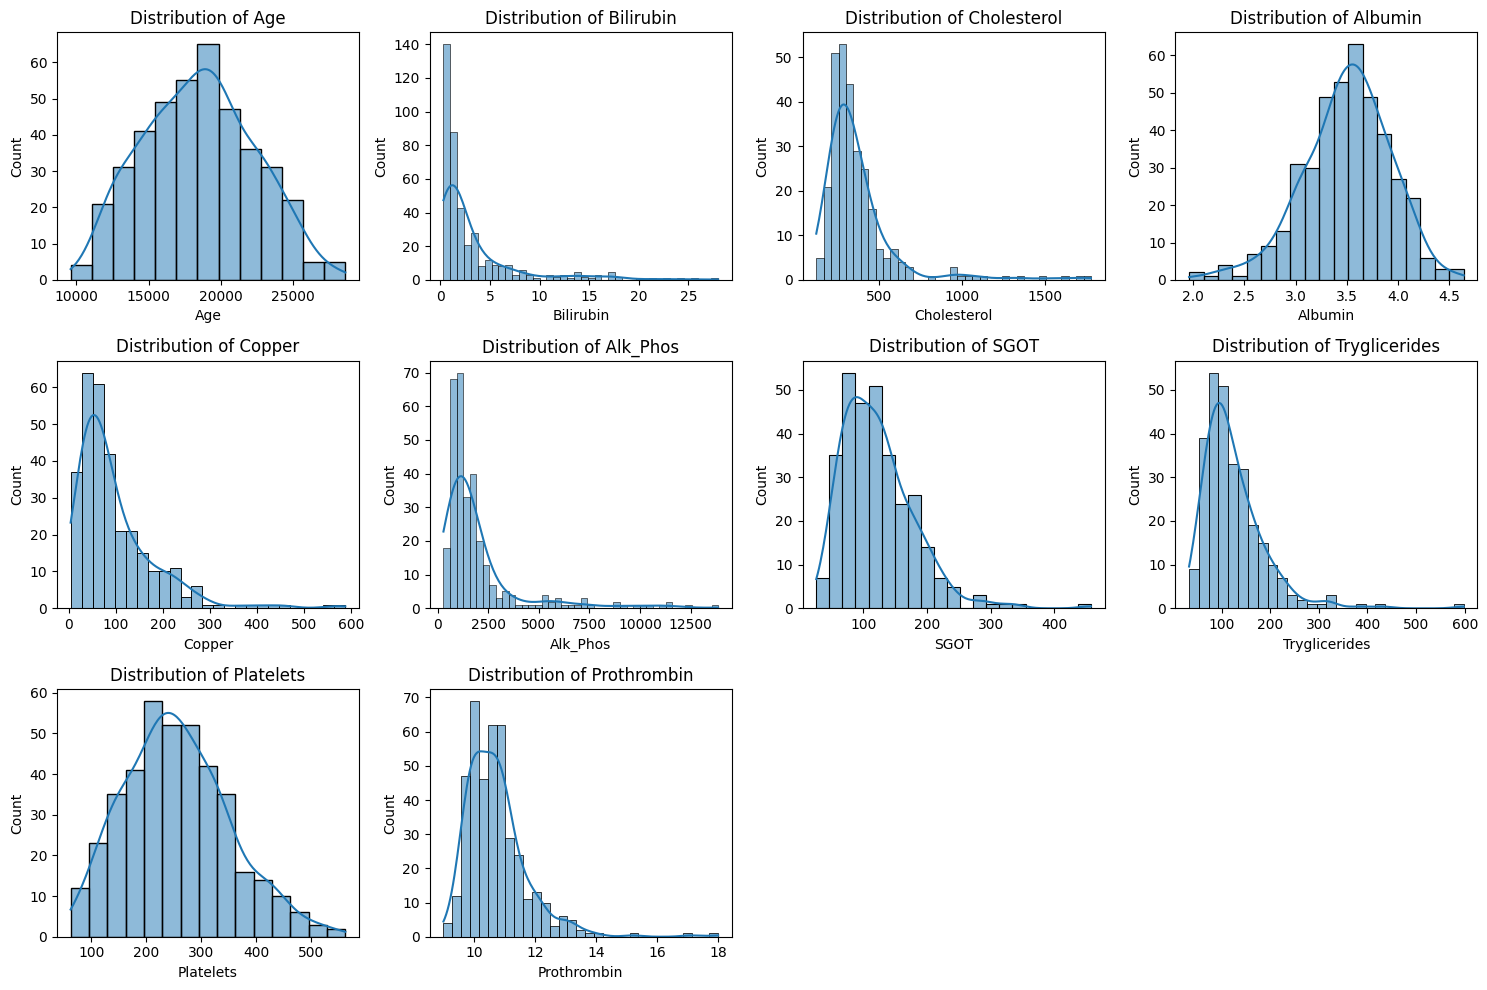

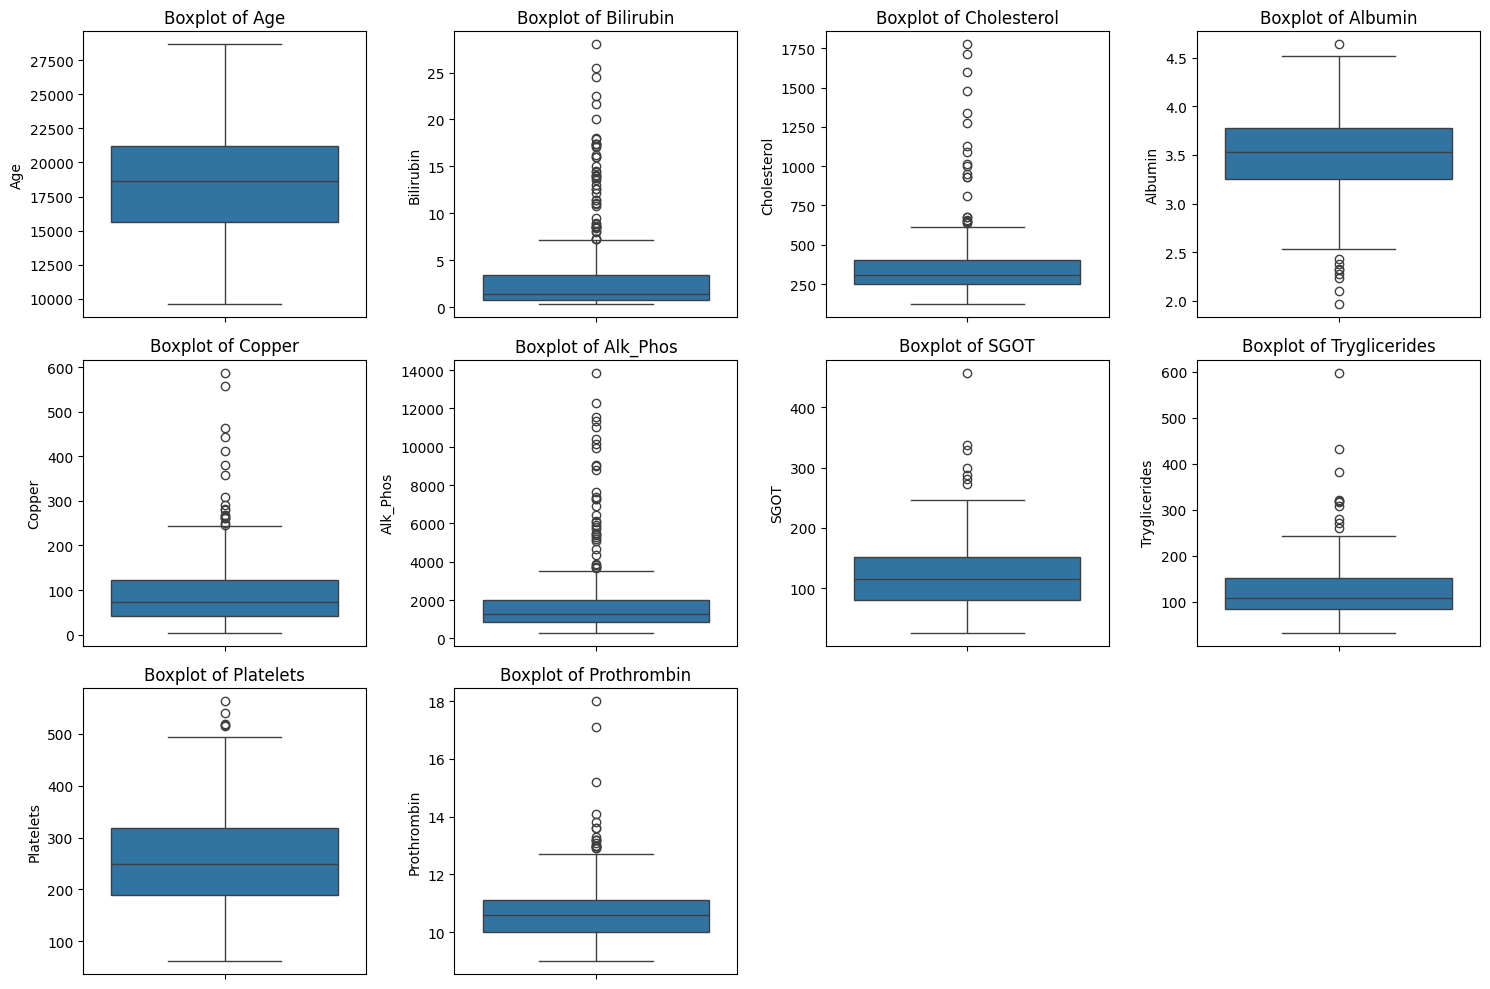

,proportion
Status,
C,0.558252
D,0.381068
CL,0.060680


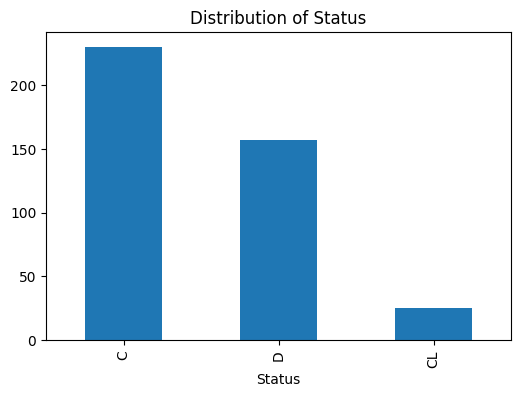

,proportion
Drug,
D-penicillamine,0.50641
Placebo,0.49359


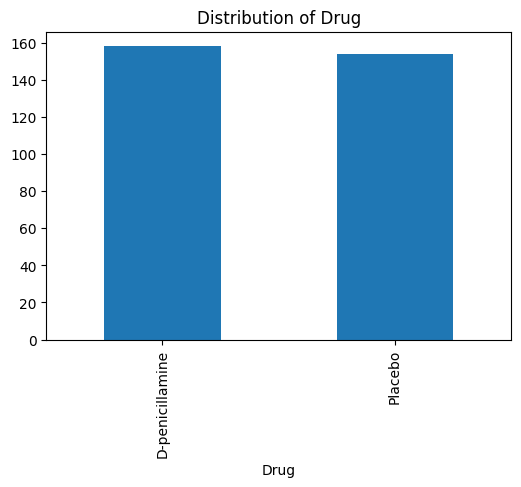

,proportion
Sex,
F,0.893204
M,0.106796


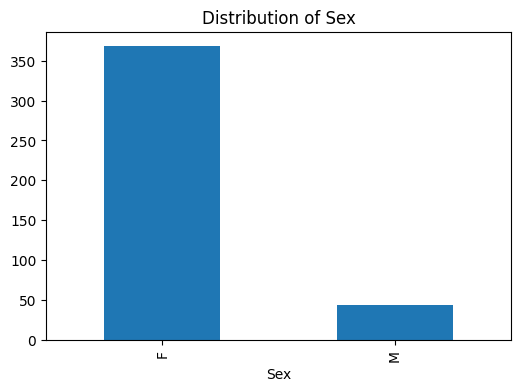

,proportion
Ascites,
N,0.923077
Y,0.076923


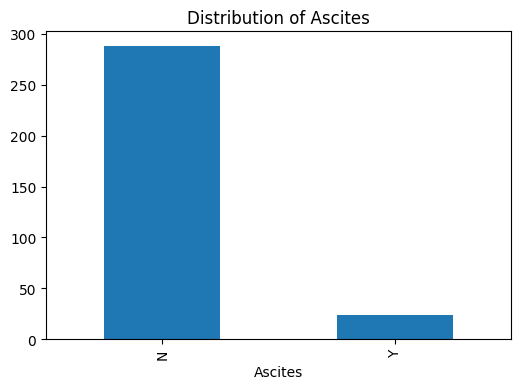

,proportion
Hepatomegaly,
Y,0.512821
N,0.487179


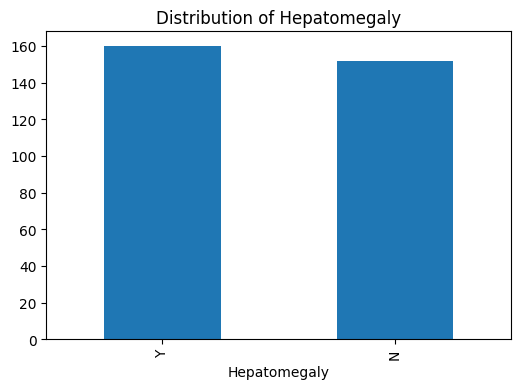

,proportion
Spiders,
N,0.711538
Y,0.288462


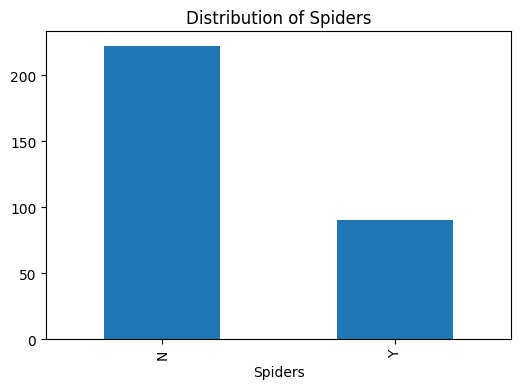

,proportion
Edema,
N,0.844660
S,0.106796
Y,0.048544


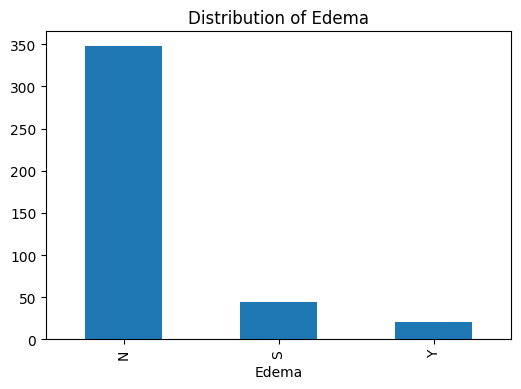

,proportion
Stage,
3.0,0.376214
4.0,0.349515
2.0,0.223301
1.0,0.050971


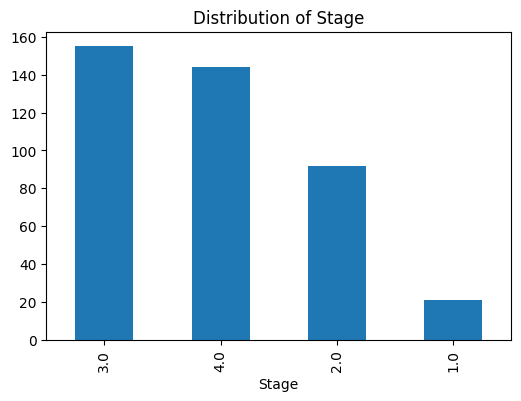

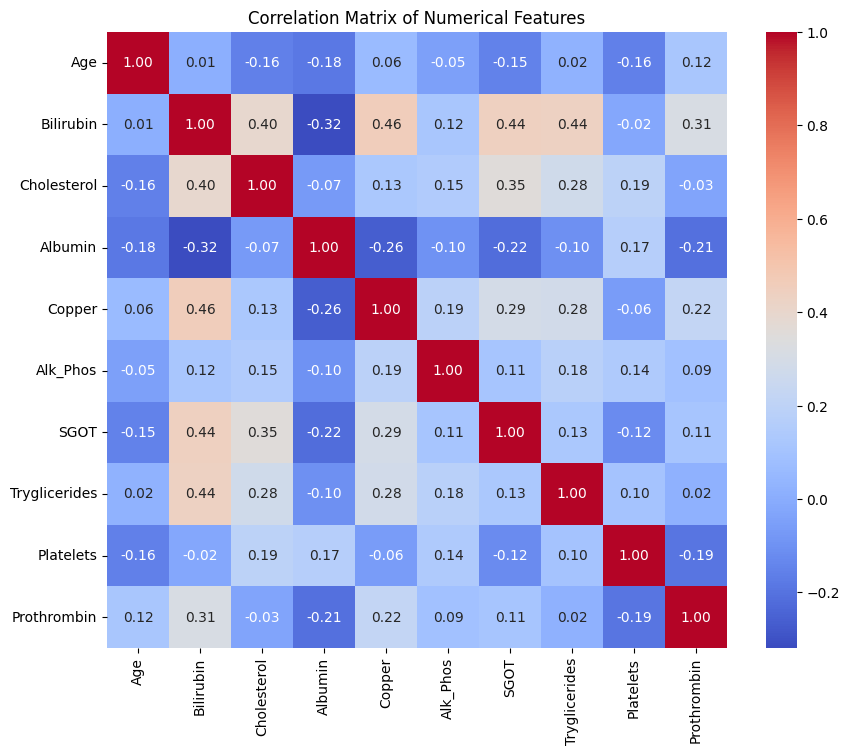

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
numerical_features = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
display(df_cirrhosis[numerical_features].describe())

# Missing Value Analysis
missing_values = df_cirrhosis.isnull().sum()
display(missing_values)
plt.figure(figsize=(10, 6))
sns.heatmap(df_cirrhosis.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

# Data Distribution Visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_cirrhosis[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df_cirrhosis[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# Categorical Variable Exploration
categorical_features = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
for col in categorical_features:
    display(df_cirrhosis[col].value_counts(normalize=True))
    plt.figure(figsize=(6, 4))
    df_cirrhosis[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation Analysis
correlation_matrix = df_cirrhosis[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Summarize Findings (Textual Summary -  Replace with your actual observations)

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


Missing values after imputation:


,0
ID,0
N_Days,6
Status,6
Drug,0
Age,6
Sex,6
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0



Descriptive statistics after cleaning:


,Cholesterol,Tryglicerides,Copper,Cholesterol,Alk_Phos,SGOT,Tryglicerides,Copper,Platelets
count,418.000000,418.000000,418.000000,418.000000,312.000000,312.000000,418.000000,418.000000,401.000000
mean,347.308455,118.241627,90.173411,347.308455,1970.383919,121.896287,118.241627,90.173411,255.992519
std,172.560750,47.345059,68.411265,172.560750,2076.755703,53.251179,47.345059,68.411265,94.985354
min,158.279621,49.428213,11.000000,158.279621,387.916147,43.400000,49.428213,11.000000,79.000000
25%,273.000000,95.000000,51.250000,273.000000,871.500000,80.600000,95.000000,51.250000,189.000000
50%,309.500000,108.000000,73.000000,309.500000,1259.000000,114.700000,108.000000,73.000000,249.000000
75%,347.750000,127.750000,100.750000,347.750000,1980.000000,151.900000,127.750000,100.750000,318.000000
max,1310.307220,318.571787,398.297184,1310.307220,11239.479518,295.860404,318.571787,398.297184,514.000000


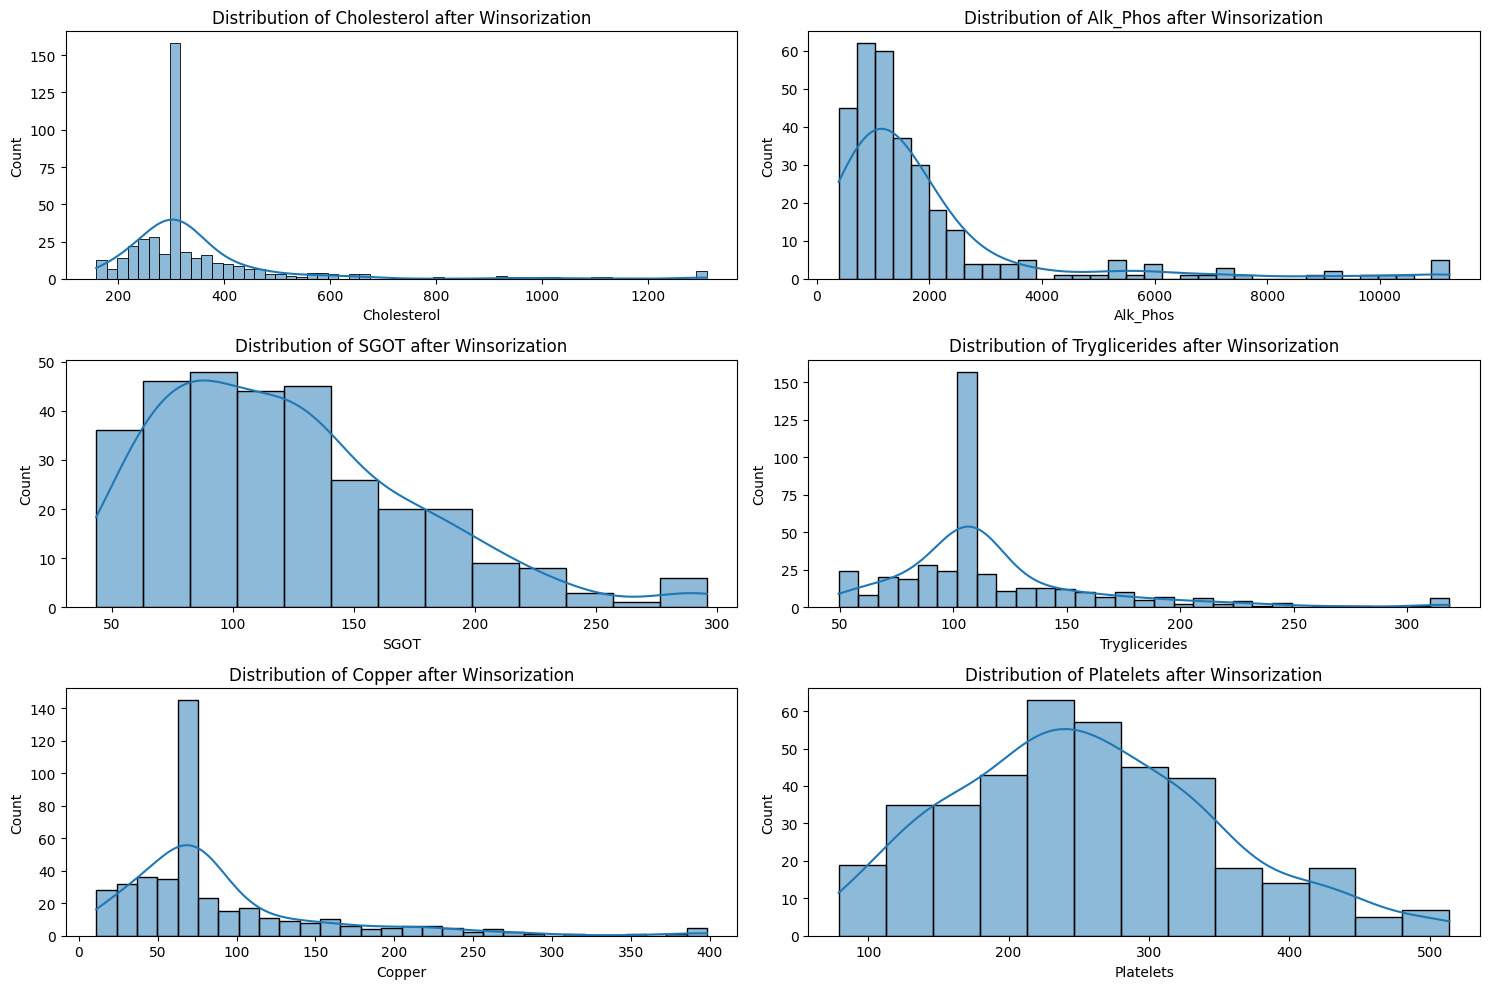

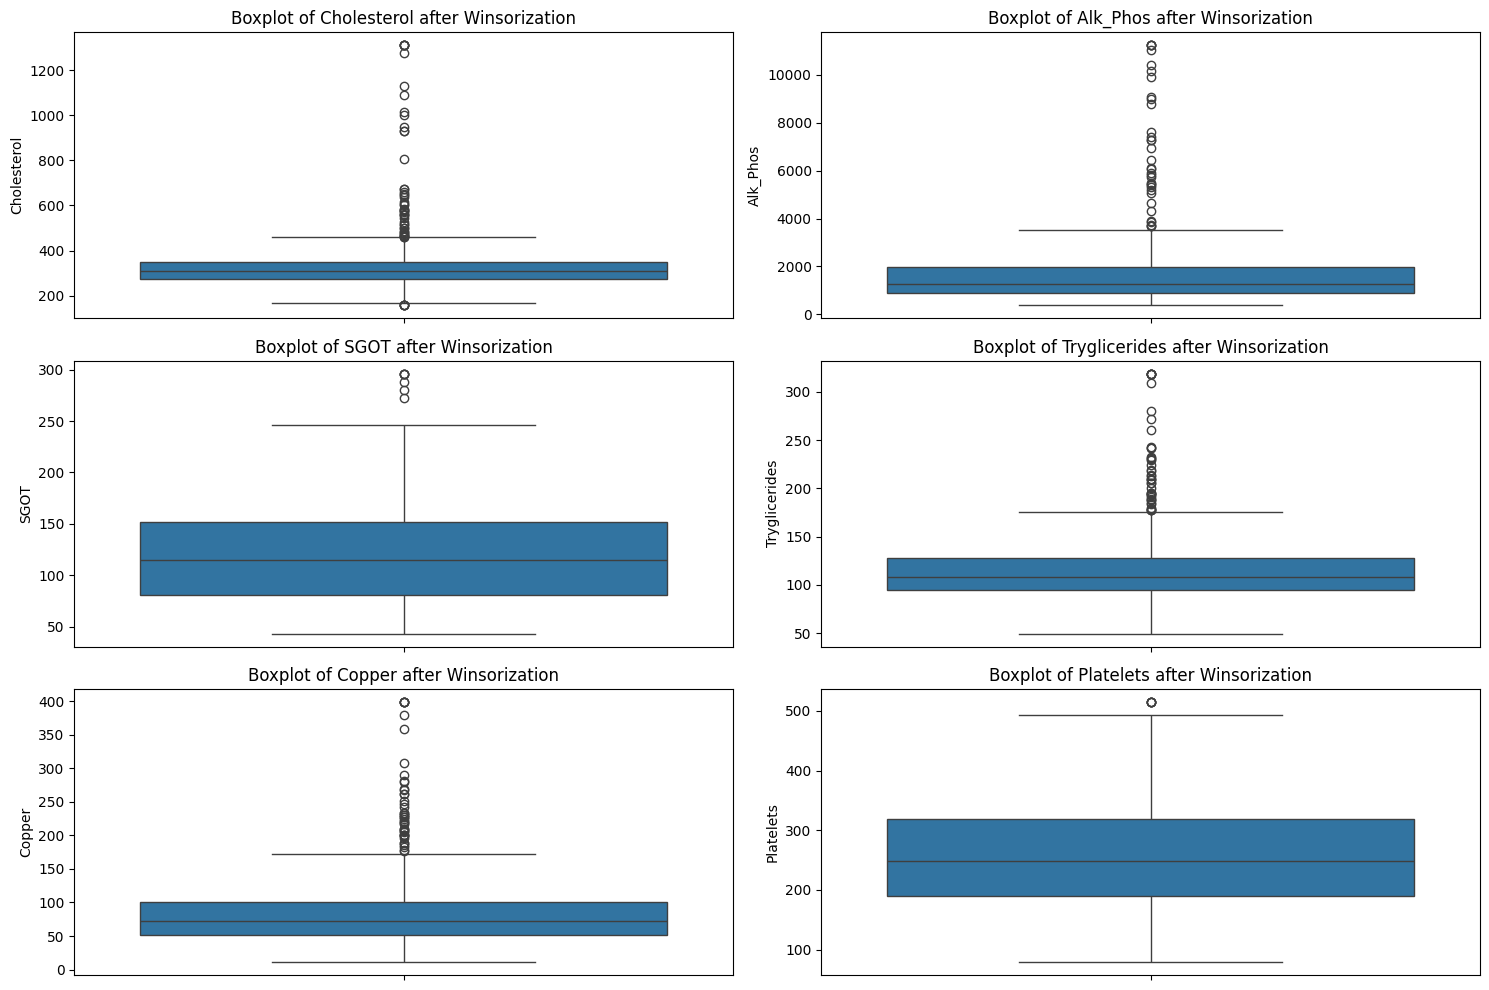

In [13]:
import numpy as np

# Missing Value Imputation
numerical_cols = ['Cholesterol', 'Tryglicerides', 'Copper']
for col in numerical_cols:
    # Use this instead of inplace=True:
    df_cirrhosis[col] = df_cirrhosis[col].fillna(df_cirrhosis[col].median())

categorical_cols = ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
for col in categorical_cols:
    # Use this instead of inplace=True:
    df_cirrhosis[col] = df_cirrhosis[col].fillna(df_cirrhosis[col].mode()[0])

# Outlier Handling (Winsorization)
winsorize_cols = ['Cholesterol', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Copper', 'Platelets']
for col in winsorize_cols:
    df_cirrhosis[col] = np.clip(df_cirrhosis[col],
                                a_min=df_cirrhosis[col].quantile(0.01),
                                a_max=df_cirrhosis[col].quantile(0.99))

# Verification
print("Missing values after imputation:")
display(df_cirrhosis.isnull().sum())

print("\nDescriptive statistics after cleaning:")
display(df_cirrhosis[numerical_cols + winsorize_cols].describe())

# Visual inspection of distributions after winsorization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
for i, col in enumerate(winsorize_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_cirrhosis[col], kde=True)
    plt.title(f'Distribution of {col} after Winsorization')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(winsorize_cols):
  plt.subplot(3, 2, i+1)
  sns.boxplot(y=df_cirrhosis[col])
  plt.title(f'Boxplot of {col} after Winsorization')
plt.tight_layout()
plt.show()

## Data preparation



In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. One-Hot Encode Categorical Features
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

# 2. Scale Numerical Features
numerical_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# 3. Separate Target Variable
X = df_encoded.drop('Status', axis=1)
y = df_encoded['Status'].replace({'C': 0, 'D': 1}) # Convert 'Status' to numerical labels

display(X.head())
display(y.head())

<ipython-input-5-a04a9539afc0>:15: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y = df_encoded['Status'].replace({'C': 0, 'D': 1}) # Convert 'Status' to numerical labels


,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Stage_2.0,Stage_3.0,Stage_4.0
0,1,-1.387694,0.781692,2.569285,-0.462810,-2.142024,0.869937,-0.043326,0.354624,0.976773,...,False,False,True,True,True,False,True,False,False,True
1,2,2.370463,0.558303,-0.477865,-0.250257,1.521172,-0.501099,2.987731,-0.143679,-0.579186,...,False,False,False,True,True,False,False,False,True,False
2,3,-0.826720,1.870946,-0.409645,-0.903470,-0.048769,1.595779,-0.685119,-0.498998,-1.190456,...,False,True,False,False,False,True,False,False,False,True
3,4,0.010157,0.393991,-0.318685,-0.550942,-2.284746,-0.366683,2.308028,-1.222487,-0.505093,...,False,False,False,True,True,True,False,False,False,True
4,5,-0.375741,-1.208505,0.045153,-0.369494,0.070166,0.695197,-0.602359,-0.151226,-0.875559,...,True,False,False,True,True,False,False,False,True,False


,Status
0,1
1,0
2,1
3,1
4,CL


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Convert 'Status' to numerical labels *before* one-hot encoding
status_mapping = {'C': 0, 'D': 1, 'CL': 2}
df_cleaned['Status'] = df_cleaned['Status'].map(status_mapping)

# 1. One-Hot Encode Categorical Features
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

# 2. Scale Numerical Features
numerical_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# 3. Separate Target Variable
X = df_encoded.drop('Status', axis=1)
y = df_encoded['Status']

display(X.head())
display(y.head())

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Stage_2.0,Stage_3.0,Stage_4.0
0,1,-1.387694,0.781692,2.569285,-0.462810,-2.142024,0.869937,-0.043326,0.354624,0.976773,...,False,False,True,True,True,False,True,False,False,True
1,2,2.370463,0.558303,-0.477865,-0.250257,1.521172,-0.501099,2.987731,-0.143679,-0.579186,...,False,False,False,True,True,False,False,False,True,False
2,3,-0.826720,1.870946,-0.409645,-0.903470,-0.048769,1.595779,-0.685119,-0.498998,-1.190456,...,False,True,False,False,False,True,False,False,False,True
3,4,0.010157,0.393991,-0.318685,-0.550942,-2.284746,-0.366683,2.308028,-1.222487,-0.505093,...,False,False,False,True,True,True,False,False,False,True
4,5,-0.375741,-1.208505,0.045153,-0.369494,0.070166,0.695197,-0.602359,-0.151226,-0.875559,...,True,False,False,True,True,False,False,False,True,False


,Status
0,1
1,0
2,1
3,1
4,2


## Data splitting




In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model evaluation




Accuracy: 0.6667
Precision: 0.6331
Recall: 0.6667
F1-score: 0.6488


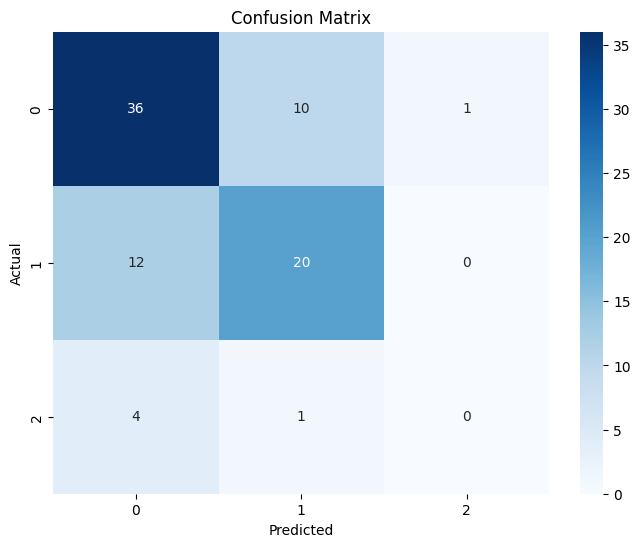

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Model optimization



Best hyperparameter: {'n_neighbors': 1}
Best score: 0.6585547785547785
Accuracy: 0.6667
Precision: 0.6691
Recall: 0.6667
F1-score: 0.6669


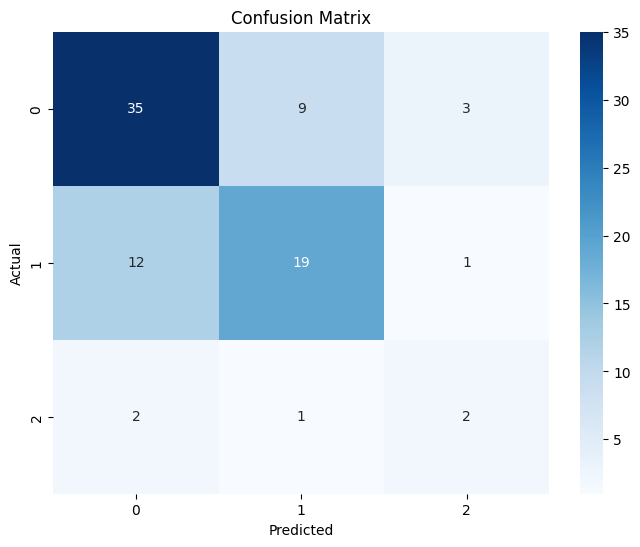

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 31)}

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameter value
print("Best hyperparameter:", grid_search.best_params_)

# Print the best score
print("Best score:", grid_search.best_score_)

# Train a new KNN classifier with the best hyperparameter
best_knn = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()